# Matrix Factorization using EVD & SVD

Let's first import the necessary modules for notebook:

In [1]:
import matplotlib.pyplot as plt # For general plotting

import numpy as np
from numpy.linalg import eig # To compute eigenvalues/vectors

# Suppress scientific notation
np.set_printoptions(suppress=True)

And define a utility function to plot vectors throughout this notebook:

In [2]:
def plotVectors(vecs, colors, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    colors : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='black', zorder=0)
    plt.axhline(y=0, color='black', zorder=0)

    # Iterate over vectors in list
    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])

        # Will plot arrows in 2D to represent vector from origin x[0] = x[1] = 0
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],
                   alpha=alpha)

Illustration of how this utility function can plot vectors as 2D arrows on a grid, say for vector:

\begin{equation}
\mathbf{u} = 
\begin{bmatrix}
3 \\
-1
\end{bmatrix}
\end{equation}

(-3.0, 4.0)

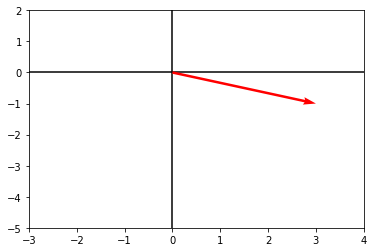

In [3]:
u = np.array([3, -1])

plotVectors([u.flatten()], colors=['red'])
# Limit range of axes
plt.ylim(-5, 2)
plt.xlim(-3, 4)

What about if we apply a matrix:

\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
0 & 1 \\
-2 & -3
\end{bmatrix}
\end{equation}

To the vector, acting as a linear transformation $\mathbf{A}\mathbf{u}$.

A:
 [[ 0  1]
 [-2 -3]]
Au:
 [-1 -3]


(-3.0, 4.0)

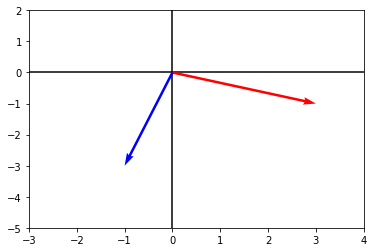

In [4]:
A = np.array([[0, 1], [-2, -3]])
print("A:\n", A)

Au = A.dot(u)
print("Au:\n", Au)

plotVectors([u.flatten(), Au.flatten()], colors=['red', 'blue'])
# Limit range of axes
plt.ylim(-5, 2)
plt.xlim(-3, 4)

## Eigenvalue Decomposition (EVD)

Recall that for a square matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$, an <i>eigenvector</i> $\mathbf{u} \in \mathbb{R}^n$ is a non-zero vector, $\mathbf{u} \neq \mathbf{0}$, with a number $\lambda \in \mathbb{R}$ such that:

\begin{equation}
\mathbf{A}\mathbf{u} = \lambda\mathbf{u}
\end{equation}

Where $\lambda$ is known as the <i>eigenvalue</i> associated with the eigenvector $\mathbf{u}$, and vice versa.

This equation can be re-written as:

\begin{equation}
(\mathbf{A} - \lambda\mathbf{I})\mathbf{u} = \mathbf{0}
\end{equation}

Where the only non-zero solution $\mathbf{u} \neq \mathbf{0}$ is iff $(\mathbf{A} - \lambda\mathbf{I})$ is <i>singular</i>, i.e. $\text{det}(\mathbf{A} - \lambda\mathbf{I}) = 0$. This $\text{det}(\mathbf{A} - \lambda\mathbf{I}) = 0$ is a polynomial of degree $n$ in the variable $\lambda$ and is known as the <i>characteristic polynomial/equation</i> of $\mathbf{A}$. 

The $n$ solutions of the characteristic equation correspond to the $n$ pairs of eigenvalue-vectors ($\lambda, \mathbf{u}$).

### Analytical Example of Nonsingular Real Matrix

Applying EVD to our above-defined matrix:

\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
0 & 1 \\
-2 & -3
\end{bmatrix}
\end{equation}

Such that:

\begin{equation}
\text{det}(\mathbf{A} - \lambda\mathbf{I}) = 
\text{det}\Bigg(
    \begin{bmatrix}
    0 & 1 \\
    -2 & -3
    \end{bmatrix} 
    - 
    \lambda \begin{bmatrix}
    1 & 0 \\
    0 & 1
    \end{bmatrix}
\Bigg) =
\text{det}
    \begin{bmatrix}
    -\lambda & 1 \\
    -2 & -3 - \lambda
    \end{bmatrix} = - \lambda(-3 - \lambda) + 2 = \lambda^2 + 3 \lambda + 2 = 0
\end{equation}

Therefore, by solving the equation we find eigenvalues: $\lambda_1 = -1, \lambda_2 = -2$.

The first eigenvector can then be found by plugging in its corresponding eigenvalue, as follows:

\begin{equation}
(\mathbf{A} - \lambda_1 \mathbf{I})\mathbf{u}_1 = 
    \begin{bmatrix}
    -\lambda_1 & 1 \\
    -2 & -3 -\lambda_1
    \end{bmatrix} \mathbf{u}_1 = 
    \begin{bmatrix}
    1 & 1 \\
    -2 & -2
    \end{bmatrix} \begin{bmatrix}u_{11} \\ u_{21} \end{bmatrix} = \mathbf{0}
\end{equation}

Which if we solve for the equations, shows that $\mathbf{u}_1$ is an $\mathbb{R}^2$ vector with equal magnitude entries but opposite signs: 

\begin{equation}
\mathbf{u}_1 = t_1 \begin{bmatrix}1 \\ -1 \end{bmatrix}
\end{equation}

Where $t_1$ is an arbitrary constant, as we are primarily interested in the ratio between $u_{11}$ and $u_{21}$.

Similarly, we find the second eigenvector:

\begin{equation}
(\mathbf{A} - \lambda_2 \mathbf{I})\mathbf{u}_2 = 
    \begin{bmatrix}
    2 & 1 \\
    -2 & -1
    \end{bmatrix} \begin{bmatrix}u_{12} \\ u_{22} \end{bmatrix} = \mathbf{0} \;\; \Rightarrow \;\; \mathbf{u}_2 = t_2 \begin{bmatrix}1 \\ -2 \end{bmatrix}
\end{equation}

### Code 

Before programmatically deriving the EVD, let's recall that we can diagonalize the matrix and write its spectral decomposition in matrix form given that $\mathbf{A}^{-1}$ exists:

\begin{equation}
\mathbf{A} = \mathbf{U}\Lambda\mathbf{U}^{-1}
\end{equation}

The following code exemplifies that relation, using the analytical EVD result from above:

In [5]:
# Eigenvalues/vectors computed above
u1 = np.array([1, -1])
u2 = np.array([1, -2])
lambdas = np.array([-1, -2])

# Write in matrix form
U = np.column_stack([u1, u2]) # Column vectors stacked into matrix
Lambda = np.diag(lambdas)
U_inv = np.linalg.inv(U) # Compute inverse of eigenvector matrix U
print("Eigenvector matrix:\n", U)
print("Diag matrix, Lambda:\n", Lambda)
print("Inverse eigenvector matrix:\n", U_inv)
      
# Let's see what our diagnolized A result is:
A_diag_test = U.dot(Lambda).dot(U_inv)
print("A original:\n", A)
print("A diagonalized:\n", A_diag_test)

Eigenvector matrix:
 [[ 1  1]
 [-1 -2]]
Diag matrix, Lambda:
 [[-1  0]
 [ 0 -2]]
Inverse eigenvector matrix:
 [[ 2.  1.]
 [-1. -1.]]
A original:
 [[ 0  1]
 [-2 -3]]
A diagonalized:
 [[ 0.  1.]
 [-2. -3.]]


Notice that the expression $\mathbf{U}\Lambda\mathbf{U}^{-1}$ consisting of eigenvalue/vector matrices leads to, as we expect, our original matrix $\mathbf{A}$. Given the two eigenvectors contained within $\mathbf{U}$, namely $\mathbf{u}_1$ and $\mathbf{u}_2$, let's see what transforming these special vectors by matrix $\mathbf{A}$ looks like graphically:

(-3.0, 4.0)

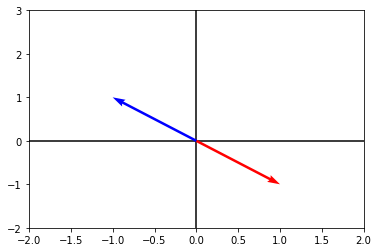

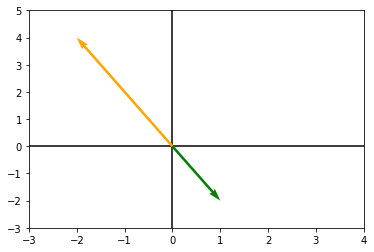

In [6]:
Au1 = A.dot(u1)
Au2 = A.dot(u2)

plotVectors([u1.flatten(), Au1.flatten()], colors=['red', 'blue'])
plt.ylim(-2, 3)
plt.xlim(-2, 2)
plotVectors([u2.flatten(), Au2.flatten()], colors=['green', 'orange'])
# Limit range of axes
plt.ylim(-3, 5)
plt.xlim(-3, 4)

Intuitively, applying $\mathbf{A}$ to an eigenvector $\mathbf{u}$ therefore give us a vector with the same direction! With only a new scale factor $\lambda$ introduced. In this case, both our scale factors $\lambda_1 = -1, \lambda_2 = -2$ are negative and so applying the matrix to the corresponding eigenvectors does not change the vector's direction, but does reverse the direction.



NOW let's tackle deriving the eigenvectors in Python. NumPy is a powerful and prevalent Python library for numerical processing of multi-dimensional arrays and matrices. Ergo, it ofcourse has an EVD function for square matrices: `linalg.eig(a)`, which is part of the Linear Algebra (LA) collection of functions.

We can compute the eigenvalue-vector pairs as above using `linalg.eig`:

In [7]:
lambdas, U = eig(A)
print("Eigenvalues:\n", lambdas)
print("Eigenvector matrix:\n", U)

Eigenvalues:
 [-1. -2.]
Eigenvector matrix:
 [[ 0.70710678 -0.4472136 ]
 [-0.70710678  0.89442719]]


Note that the eigenvalues $\lambda_1$ and $\lambda_2$ are as we derived, however the eigenvectors (printed above as a matrix $\mathbf{U}$) are instead:

\begin{equation}
    \mathbf{u}_1 = \begin{bmatrix}\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix}, \;
    \mathbf{u}_2 = \begin{bmatrix}-\frac{1}{\sqrt{5}} \\ \frac{2}{\sqrt{5}} \end{bmatrix}
\end{equation}

Which is because NumPy provides the normalized (unit “length”) eigenvectors, i.e. $||\mathbf{u}||_2 = 1$. 

As mentioned earlier, we are only interested in the ratio between eigenvector entries and so difference scaling does not affect the $\mathbf{A}\mathbf{u} = \lambda \mathbf{u}$ property. For instance, $\mathbf{u}_2$ obtained using `linalg.eig` has switched signs from our analytical derivation. See below for plots to illustrate that this won't affect the result.

(-2.0, 2.0)

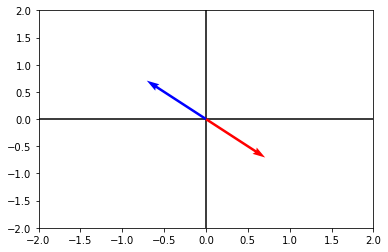

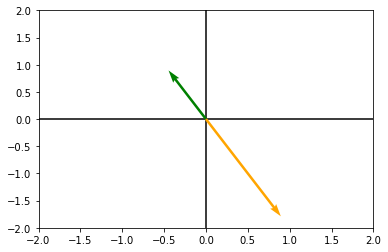

In [8]:
u1 = U[:, 0]
u2 = U[:, 1] # Slicing to return columns
Au1 = A.dot(u1)
Au2 = A.dot(u2)

plotVectors([u1.flatten(), Au1.flatten()], colors=['red', 'blue'])
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plotVectors([u2.flatten(), Au2.flatten()], colors=['green', 'orange'])
# Limit range of axes
plt.ylim(-2, 2)
plt.xlim(-2, 2)

See how the red and green eigenvectors are normalized $||\mathbf{u}||_2 = 1$, and how applying the $\mathbf{A}$ linear transformation results in $\lambda$ scaled versions of the vectors. As both $\lambda < 0$, the resulting transformation produces a vector in the opposite direction of the original eigenvector.

### Real Symmetric Matrix Example

What about a real <b>symmetric</b> matrix, $\mathbf{B} = \mathbf{B}^\intercal$? Let's go through the same process as before, but for:

\begin{equation}
\mathbf{B} = 
\begin{bmatrix}
0 & 1 \\
1 & -3
\end{bmatrix}
\end{equation}

Remembering that when $\mathbf{B} = \mathbf{B}^\intercal$, then the eigenvectors are <b>orthonormal</b> (normalized orthogonal vectors) and so the matrix of the eigenvectors for $\mathbf{B}$, written as $\mathbf{U}$ like above, is <b>orthogonal</b>. We also know that for orthogonal matrices, the following relation holds:

\begin{equation}
\mathbf{U}^\intercal \mathbf{U} = \mathbf{I} = \mathbf{U} \mathbf{U}^\intercal
\end{equation}

Where $\mathbf{I}$ is the identity matrix. As a result, we can rearrange above to demonstrate:

\begin{equation}
\mathbf{U}^\intercal \mathbf{U} = \mathbf{I} \implies \mathbf{U}^\intercal = \mathbf{I} \mathbf{U}^{-1} \implies \mathbf{U}^\intercal = \mathbf{U}^{-1}
\end{equation}

Allowing us finally to write the "diagonlization" of $\mathbf{B}$ as:

\begin{equation}
\mathbf{B} = \mathbf{U}\Lambda\mathbf{U}^\intercal
\end{equation}

Let's test this in code:

In [9]:
B = np.array([[0, 1], [1, -3]])

lambdas, U = eig(B)
Lambda = np.diag(lambdas)

print("Lambda:\n", Lambda)

# Let's see what our diagnolized b result is:
B_diag_test = U.dot(Lambda).dot(U.T) # NOTE: Took transpose U, not inverse, hence U.T
print("B original:\n", B)
print("B diagonalized:\n", B_diag_test)

Lambda:
 [[ 0.30277564  0.        ]
 [ 0.         -3.30277564]]
B original:
 [[ 0  1]
 [ 1 -3]]
B diagonalized:
 [[-0.  1.]
 [ 1. -3.]]


And as plots:

(-1.0, 3.0)

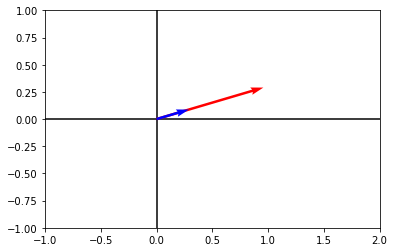

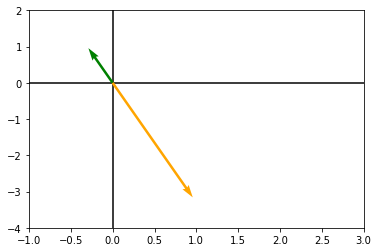

In [10]:
u1 = U[:, 0]
u2 = U[:, 1] # Slicing to return columns
Bu1 = B.dot(u1)
Bu2 = B.dot(u2)

plotVectors([u1.flatten(), Bu1.flatten()], colors=['red', 'blue'])
plt.ylim(-1, 1)
plt.xlim(-1, 2)
plotVectors([u2.flatten(), Bu2.flatten()], colors=['green', 'orange'])
# Limit range of axes
plt.ylim(-4, 2)
plt.xlim(-1, 3)

The blue arrow in the above plot is associated with the expression $\mathbf{B}\mathbf{u}_1 = \lambda_1 \mathbf{u}_1$, where the printed diagonal $\Lambda$ above shows that $\lambda_1 = 0.30277564$ is a positive eigenvalue. This is why the vectors are in the same direction.

## Singular Value Decomposition (SVD)

We can also decompose a non-square matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ using SVD, which generalizes EVD to rectangular matrices.

### Example and Code
Take the following matrix:

\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
3 & 2 & 2 \\
2 & 3 & -2
\end{bmatrix}
\end{equation}

Import corresponding `linalg.svd` function and compute singular values (denoted $\sigma$) and singular vectors:

In [11]:
from numpy.linalg import svd

A = np.array([[3, 2, 2],
              [2, 3, -2]])
print("A:", A)

u, s, v = svd(A)
print("Left singular vectors:", u)
print("Singular values:", s)
print("Right singular vectors:", v)

A: [[ 3  2  2]
 [ 2  3 -2]]
Left singular vectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Singular values: [5. 3.]
Right singular vectors: [[ 0.70710678  0.70710678  0.        ]
 [-0.23570226  0.23570226 -0.94280904]
 [-0.66666667  0.66666667  0.33333333]]


Writing the SVD of $\mathbf{A} = \mathbf{U}\mathbf{S}\mathbf{V}^\intercal =$ in matrix form, where generally the columns of $\mathbf{U} \in \mathbb{R}^{m \times m}$ are the left singular vectors, $\mathbf{S} = \text{diag}(\sigma_1, ... \sigma_r) \in \mathbb{R}^{m \times n} $ are the $r = \text{min}(m, n)$ singular values on the main diagonal, and the columns of $\mathbf{V} \in \mathbb{R}^{n \times n}$ are the right singular vectors.

Therefore based on our code results, the full SVD for the specific example of $\mathbf{A}$ is:

\begin{equation}
\mathbf{A} = \mathbf{U}\mathbf{S}\mathbf{V}^\intercal =
    \begin{bmatrix}
    \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} 
    \end{bmatrix}
    \begin{bmatrix}
    5 & 0 & 0 \\ 0 & 3 & 0
    \end{bmatrix}
    \begin{bmatrix}
    \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
    -\frac{1}{\sqrt{18}} & \frac{1}{\sqrt{18}} & -\frac{4}{\sqrt{18}} \\
    -\frac{2}{3} & \frac{2}{3} & \frac{1}{3}
    \end{bmatrix}
\end{equation}

In the NumPy description of what `linalg.svd` returns, observe that the singular values of the "s(…, K)" array are sorted in decreasing order. This is fairly conventional for SVD, but not necessary in EVD.

## References

Code adapted from:

https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/